## 1. Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
final_df = pd.read_csv('final_data_10k.csv',usecols=['Cabin Staff Service','Food & Beverages','Ground Service','Inflight Entertainment','Seat Comfort','Value For Money','Recommended'])
final_df.head(10)

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Seat Comfort,Value For Money,Recommended
0,0.00,0.00,0.00,0.00,0.00,0.00,0
1,0.00,0.00,0.00,0.00,0.00,0.00,0
2,0.00,0.00,0.00,0.00,0.00,0.00,0
3,0.25,0.00,0.00,0.00,0.00,0.00,0
4,0.00,0.00,0.00,0.00,0.25,0.00,0
5,1.00,0.75,1.00,0.75,1.00,0.75,1
6,1.00,0.75,1.00,1.00,1.00,0.75,1
7,1.00,0.00,0.75,0.50,0.50,0.00,0
8,0.00,0.25,0.50,0.00,0.00,0.00,0
9,0.00,0.00,0.25,0.25,0.50,0.25,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

In [4]:
X = final_df[['Cabin Staff Service', 'Food & Beverages', 'Ground Service'
        , 'Inflight Entertainment', 'Seat Comfort', 'Value For Money']]
y = final_df['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import scipy.stats
import warnings
from functools import reduce

warnings.filterwarnings("ignore")

model = LogisticRegression(random_state=42)

param_dist = {
    'penalty': ['l1','l2','none'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'fit_intercept': [True, False],
}
# total_values=1
# total_values = reduce(lambda x, y: x * y, [len(values) for values in param_dist.values()])
#random_search = GridSearchCV(model, param_dist, cv=5, error_score=0)

random_search=RandomizedSearchCV(model, param_distributions=param_dist, cv=5, n_iter=100,error_score=0)
# Huấn luyện RandomizedSearchCV object trên Training set
random_search.fit(X_train, y_train)

# In bộ siêu tham số tốt nhất của mô hình

print('Best hyperparameters:', random_search.best_params_)
#print('hyperparameters:', random_search.cv_results_)

print('Best score:', random_search.best_score_)
results = random_search.cv_results_

df = pd.DataFrame({
    'C': results['param_C'],
    'penalty': results['param_penalty'],
    'solver':results['param_solver'],
    'fit_intercept':results['param_fit_intercept'],
    'mean_test_score': results['mean_test_score']

})
df_sorted = df.sort_values(by='mean_test_score', ascending=False)
df_sorted

Best hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'fit_intercept': True, 'C': 100}
Best score: 0.9442300485580105


,C,penalty,solver,fit_intercept,mean_test_score
18,10,l1,saga,True,0.94423
81,10,l2,saga,True,0.94423
87,10,l2,lbfgs,True,0.94423
4,100,l2,saga,True,0.94423
93,0.1,l1,liblinear,True,0.94423
...,...,...,...,...,...
76,100,l1,lbfgs,True,0.00000
55,100,none,liblinear,True,0.00000
78,100,l1,lbfgs,False,0.00000
34,1,l1,sag,False,0.00000


In [6]:
# Khởi tạo mô hình Random Forest Classifier
lr_model = LogisticRegression(C= random_search.best_params_['C'], fit_intercept= random_search.best_params_['fit_intercept'], penalty= random_search.best_params_['penalty'], solver= random_search.best_params_['solver'])

# Huấn luyện mô hình trên tập huấn luyện
lr_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
lr_predictions  = lr_model.predict(X_test)

# In các metrics
lr_report = classification_report(y_test, lr_predictions)
mae_linear = mean_absolute_error(y_test, lr_predictions)
lr_confusion_mat = confusion_matrix(y_test, lr_predictions)

## 2. Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

# Khởi tạo mô hình RandomForestClassifier
rfc_model = RandomForestClassifier()

# Khai báo các siêu tham số và phân phối ngẫu nhiên cho các giá trị của chúng
param_dist = {
    'n_estimators': scipy.stats.randint(100, 500),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': scipy.stats.randint(2, 10),
    'min_samples_leaf': scipy.stats.randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Tạo RandomizedSearchCV object với 5-fold cross-validation
random_search = RandomizedSearchCV(rfc_model, param_distributions=param_dist, cv=5, n_iter=100)

# Huấn luyện RandomizedSearchCV object trên Training set
random_search.fit(X_train, y_train)

# In bộ siêu tham số tốt nhất của mô hình
print('Best hyperparameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)
results = random_search.cv_results_

df = pd.DataFrame({
    'n_estimators': results['param_n_estimators'],
    'criterion': results['param_criterion'],
    'max_depth': results['param_max_depth'],
    'min_samples_split':results['param_min_samples_split'],
    'min_samples_leaf':results['param_min_samples_leaf'],
    'max_features':results['param_max_features'],
    'mean_test_score': results['mean_test_score']

})
df_sorted = df.sort_values(by='mean_test_score', ascending=False)
df_sorted

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 121}
Best score: 0.9458272093186022


,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,mean_test_score
38,121,entropy,10,8,2,sqrt,0.945827
58,106,entropy,20,9,4,sqrt,0.945561
8,327,entropy,None,5,4,log2,0.945295
0,492,entropy,10,3,3,sqrt,0.945162
57,342,gini,10,2,4,sqrt,0.945162
...,...,...,...,...,...,...,...
65,352,entropy,30,2,1,sqrt,0.936377
56,272,entropy,None,2,1,sqrt,0.935978
90,217,gini,None,2,1,sqrt,0.935844
50,214,gini,20,3,1,None,0.935046


In [8]:
# Khởi tạo mô hình Random Forest Classifier
rfc_model = RandomForestClassifier(criterion= random_search.best_params_['criterion'], max_depth= random_search.best_params_['max_depth'], max_features= random_search.best_params_['max_features'], min_samples_leaf= random_search.best_params_['min_samples_leaf'], min_samples_split= random_search.best_params_['min_samples_split'], n_estimators= random_search.best_params_['n_estimators'])

# Huấn luyện mô hình trên tập huấn luyện
rfc_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
rfc_predictions = rfc_model.predict(X_test)

# In các metrics
rfc_report = classification_report(y_test, rfc_predictions)
mae_random = mean_absolute_error(y_test, rfc_predictions)
rfc_confusion_mat = confusion_matrix(y_test, rfc_predictions)

## 3. Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

# Khởi tạo mô hình DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()

# Khai báo các siêu tham số và phân phối ngẫu nhiên cho các giá trị của chúng
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': scipy.stats.randint(2, 10),
    'min_samples_leaf': scipy.stats.randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Tạo RandomizedSearchCV object với 5-fold cross-validation
random_search = RandomizedSearchCV(dtc_model, param_distributions=param_dist, cv=5, n_iter=100)

# Huấn luyện RandomizedSearchCV object trên Training set
random_search.fit(X_train, y_train)

# In bộ siêu tham số tốt nhất của mô hình
print('Best hyperparameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)
results = random_search.cv_results_

df = pd.DataFrame({
    'criterion': results['param_criterion'],
    'max_depth': results['param_max_depth'],
    'min_samples_split':results['param_min_samples_split'],
    'min_samples_leaf':results['param_min_samples_leaf'],
    'max_features':results['param_max_features'],
    'mean_test_score': results['mean_test_score']

})
df_sorted = df.sort_values(by='mean_test_score', ascending=False)
df_sorted

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 4}
Best score: 0.9389057659204451


,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,mean_test_score
4,gini,10,4,4,log2,0.938906
12,gini,10,9,2,sqrt,0.938373
59,entropy,None,3,3,log2,0.938241
65,gini,10,3,4,None,0.938107
58,gini,10,7,4,None,0.938107
...,...,...,...,...,...,...
77,gini,30,4,1,sqrt,0.922135
74,entropy,20,2,1,log2,0.922001
6,gini,30,2,1,None,0.922001
49,gini,20,2,1,log2,0.920804


In [10]:
# Khởi tạo mô hình Decision Tree Classifier
dtc_model = DecisionTreeClassifier(criterion= random_search.best_params_['criterion'], max_depth= random_search.best_params_['max_depth'], max_features= random_search.best_params_['max_features'], min_samples_leaf= random_search.best_params_['min_samples_leaf'], min_samples_split= random_search.best_params_['min_samples_split'])

# Huấn luyện mô hình trên tập huấn luyện
dtc_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
dtc_predictions = dtc_model.predict(X_test)

# In các metrics
dtc_report = classification_report(y_test, dtc_predictions)
mae_decision = mean_absolute_error(y_test, dtc_predictions)
dtc_confusion_mat = confusion_matrix(y_test, dtc_predictions)

Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2071
           1       0.91      0.93      0.92      1149

    accuracy                           0.94      3220
   macro avg       0.94      0.94      0.94      3220
weighted avg       0.94      0.94      0.94      3220

Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2071
           1       0.91      0.93      0.92      1149

    accuracy                           0.94      3220
   macro avg       0.93      0.94      0.94      3220
weighted avg       0.94      0.94      0.94      3220

Decision Tree:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2071
           1       0.91      0.91      0.91      1149

    accuracy                           0.94      3220
   macro avg       0.93      0.93      0.93      3220
weighted avg       0

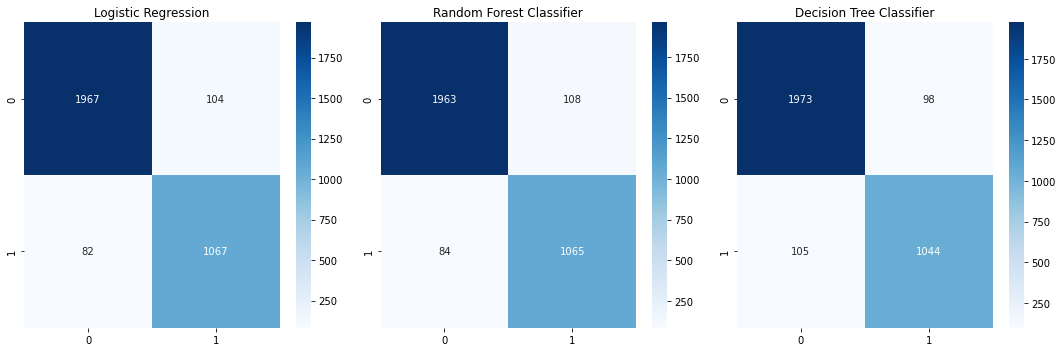

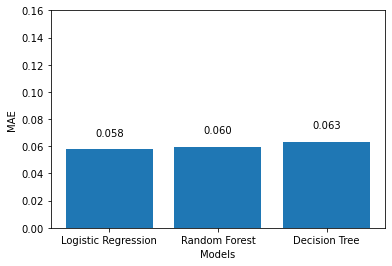

In [11]:
# metrics classification_report
print('Logistic Regression:\n',lr_report)
print('Random Forest:\n',rfc_report)
    print('Decision Tree:\n',dtc_report)

# metrics confusion_matrix
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].set_title('Logistic Regression')
sns.heatmap(lr_confusion_mat, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[1].set_title('Random Forest Classifier')
sns.heatmap(rfc_confusion_mat, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[2].set_title('Decision Tree Classifier')
sns.heatmap(dtc_confusion_mat, annot=True, cmap='Blues', fmt='g', ax=axes[2])
plt.tight_layout()
plt.show()

# metrics mean_absolute_error
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
mae_values = [mae_linear, mae_random, mae_decision]
plt.ylim(0, 0.16)
plt.bar(models, mae_values)
plt.xlabel('Models')
plt.ylabel('MAE')
for i, v in enumerate(mae_values):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.show()